# _Python for Scientific Data Analysis_


#  AstroPy and AstroQuery

## Section 2c: Astropy Coordinates

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Also, for this section, we will be grabbing files from the ./sect2/code/files/ directory often.  So we save this as a variable

In [48]:
directory='./code/sect2/files/'



[note: as in the prior section, the official documentation/tutorials on astropy for _coordinates_ is really good.  So much of the discussion will basically copy that].

The _**coordinates**_ package provides classes for representing a variety of celestial/spatial coordinates and their velocity components, as well as tools for converting between common coordinate systems in a uniform way.

#### _SkyCoord_

The best way to start using coordinates is to use the SkyCoord class. SkyCoord objects are instantiated by passing in positions (and optional velocities) with specified units and a coordinate frame. Sky positions are commonly passed in as Quantity objects and the frame is specified with the string name.

To create a SkyCoord object to represent an ICRS (Right ascension [RA], Declination [Dec]) sky position, the major import command is ``from astropy.coordinates import SkyCoord``.  Below are two simple demonstrations:

In [53]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord
c1 = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c2 = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')

print(c1)
print(c2)

c1.ra.hms
#c1.dec

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>
<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>


hms_tuple(h=0.0, m=42.0, s=30.0)

Note that in the first case, you do not need to multiply by u.[unit], as AstroPy interprets the two strings directly.   Similarly, writing coordinate strings in degrees:minutes:seconds works.   E.g. ``SkyCoord('00d42m30s', '+41d12m00s', frame='icrs')``.  Angle units must be specified for all components, either by passing in a Quantity object (e.g., ``10.5*u.degree``), by including them in the value (e.g., ``'+41d12m00s'``), or via the ``unit`` keyword.

The right ascension and declination for the object c can then be accessed as a property of c: e.g. ``c.ra`` or ``c.dec``.  

SkyCoord and all other coordinates objects also support array coordinates. These work in the same way as single-value coordinates, but they store multiple coordinates in a single object. When you are going to apply the same operation to many different coordinates (say, from a catalog), this is a better choice than a list of SkyCoord objects, because it will be much faster than applying the operation to each SkyCoord in a for loop. Like the underlying ndarray instances that contain the data, SkyCoord objects can be sliced, reshaped, etc., and can be used with functions like numpy.moveaxis, etc., that affect the shape:

In [54]:
c = SkyCoord(ra=[10, 11, 12, 13]*u.degree, dec=[41, -5, 42, 0]*u.degree)
print(c)
#<SkyCoord (ICRS): (ra, dec) in deg
#    [(10., 41.), (11., -5.), (12., 42.), (13.,  0.)]>
c[1]

<SkyCoord (ICRS): (ra, dec) in deg
    [(10., 41.), (11., -5.), (12., 42.), (13.,  0.)]>


<SkyCoord (ICRS): (ra, dec) in deg
    (11., -5.)>

In [41]:
##<SkyCoord (ICRS): (ra, dec) in deg
#    (11., -5.)>
c.reshape(2, 2)
#<SkyCoord (ICRS): (ra, dec) in deg
#    [[(10., 41.), (11., -5.)],
#     [(12., 42.), (13.,  0.)]]>
#np.roll(c, 1)
#<SkyCoord (ICRS): (ra, dec) in deg
#    [(13.,  0.), (10., 41.), (11., -5.), (12., 42.)]>

<SkyCoord (ICRS): (ra, dec) in deg
    [[(10., 41.), (11., -5.)],
     [(12., 42.), (13.,  0.)]]>

SkyCoord also works with named variables.   E.g. listing the HMSDMS coordinates for several stars as tuples and then reading them into SkyCoord.

#### _Coordinate Access_

Once you have a coordinate object you can access the components of that coordinate (e.g., RA, Dec) to get string representations of the full coordinate.

The component values are accessed using (typically lowercase) named attributes that depend on the coordinate frame (e.g., ICRS, Galactic, etc.). For the default, ICRS, the coordinate component names are ra and dec.   you can further list attributes of attributes to get combinations of coordinates.

In [55]:

c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree)
print(c.ra)
print(type(c.ra))
#<Longitude 10.68458 deg>
print(c.ra.hour )

#0.7123053333333335

print(c.ra.hms  )
#hms_tuple(h=0.0, m=42.0, s=44.299200000000525)

print(c.dec.degree  )
#41.26917

print(c.dec.radian)
#0.7202828960652683


10d41m04.488s
<class 'astropy.coordinates.angles.core.Longitude'>
0.7123053333333335
hms_tuple(h=0.0, m=42.0, s=44.299200000000525)
41.26917
0.7202828960652683


Coordinates can be converted to strings using the ``to_string()`` method:

In [56]:
print(c.to_string('decimal'))
#'10.6846 41.2692'
print(c.to_string('dms'))
#'10d41m04.488s 41d16m09.012s'

print(c.to_string('hmsdms'))
#00h42m44.2992s +41d16m09.012s

10.6846 41.2692
10d41m04.488s 41d16m09.012s
00h42m44.2992s +41d16m09.012s


#### _Astronomical Coordinate Systems_

Astronomers use different coordinate systems depending on their needs. The most common systems include:

- **ICRS (International Celestial Reference System)**: The modern standard coordinate system, the frame axes are fixed relative to distant quasars.  Stellar positions change only due to proper motion and parallax.  This is the default frame in Astropy and effectively replaced older systems like FK5 for most purposes.

- **FK5 (Fifth Fundamental Catalogue)**: An older equatorial coordinate system based on stellar positions. The frame axes precess due to the Earth's precession over time. Stellar positions change due to proper motion _and_ frame precession. 

- **Galactic**: Centered on the Galactic plane, useful for studying the structure of our Milky Way or positions of stars relative to the Milky Way.

- **AltAz (Altitude-Azimuth)**: Observer-specific coordinates that depend on location and time, used for telescope pointing.

Different coordinate systems are optimized for different tasks. ICRS is ideal for catalog positions, Galactic coordinates are natural for studying our galaxy's structure, and AltAz coordinates are essential for actual observations.

#### _Transforming Between Coordinate Systems_

Often you'll need to convert coordinates between different systems. For example, you might:
- Receive catalog data in ICRS but need Galactic coordinates for a star
- Convert between different equinox epochs (e.g., J2000.0 to J2010.0) for studying a star's proper motion
- Transform to observer-based AltAz coordinates for telescope observations planning/pointing

One convenient way to transform to a new coordinate frame is by accessing the appropriately named attribute.

To get the coordinate in the Galactic frame use:

In [57]:

c_icrs = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, frame='icrs')
print(c_icrs.galactic  )
#<SkyCoord (Galactic): (l, b) in deg
#   (121.17424181, -21.57288557)>


<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>


For more control, you can use the transform_to method, which accepts a frame name, frame class, or frame instance:

    

In [58]:
# Transform from ICRS to FK5
# Note: ICRS and FK5 J2000.0 differ only slightly (mas-level)

c_fk5 = c_icrs.transform_to('fk5')
#<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
#    (10.68459154, 41.26917146)>
print(c_fk5)
print(f"Difference: RA = {(c_fk5.ra - c_icrs.ra).to(u.arcsec):.3f}, "
      f"Dec = {(c_fk5.dec - c_icrs.dec).to(u.arcsec):.3f}")

from astropy.coordinates import FK5
c_fk5.transform_to(FK5(equinox='J2010')) 
#<SkyCoord (FK5: equinox=J1975.000): (ra, dec) in deg
#    (10.34209135, 41.13232112)>


<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (10.68459154, 41.26917146)>
Difference: RA = 0.042 arcsec, Dec = 0.005 arcsec


<SkyCoord (FK5: equinox=J2010.000): (ra, dec) in deg
    (10.82183569, 41.32386454)>

This form of transform_to also makes it possible to convert from celestial coordinates to AltAz coordinates, allowing the use of SkyCoord as a tool for planning observations. For a more complete example of this, see Determining and plotting the altitude/azimuth of a celestial object.

#### _Working with Proper Motion and Time_

Things in the sky move, especially nearby stars (if this were not true, we would never be able to measure stellar parallax and get distances to things).   One of the helpful features of `astropy.coordinates` is the ability to account for stellar motion over time. Stars move due to their actual motion through space (proper motion) and their motion toward/away from us (radial velocity). 

**Proper motion** is the apparent angular motion of a star across the sky, typically measured in milliarcseconds per year (mas/yr). The `SkyCoord` object can store proper motion and propagate stellar positions to different epochs.

**The role of `Time` objects**: In Astropy, time is handled by the `astropy.time.Time` class. This is crucial because:
- We need to specify *when* a position measurement was made (the `obstime` - observation time)
- We can then calculate where the star *will be* at a different time by applying its proper motion
- `Time` objects handle different time scales (UTC, TDB, etc.) and calendar systems uniformly
  

Below is an example of doing these calculations with  Barnard's Star, which has one of the largest proper motions of any known star ( about 10.3 arcseconds/year !!!):

Reference epoch: 2000-01-01 12:00:00.000
As Julian year: 2000.0

Barnard's Star at epoch J2000.0:
RA:  17h57m48.50s
Dec: 4d41m36.20s
Proper motion in RA*cos(dec): -798.7100000000002 mas / yr
Proper motion in Dec: 10337.77 mas / yr

Barnard's Star at epoch J2025.0 (25 years later):
RA:  17h57m47.16s
Dec: 4d45m54.65s

Position change over 25.0 years:
  ΔRA:  -20.04 arcsec = -0.334 arcmin
  ΔDec: +258.44 arcsec = +4.307 arcmin
  Total angular motion: 259.22 arcsec = 4.320 arcmin



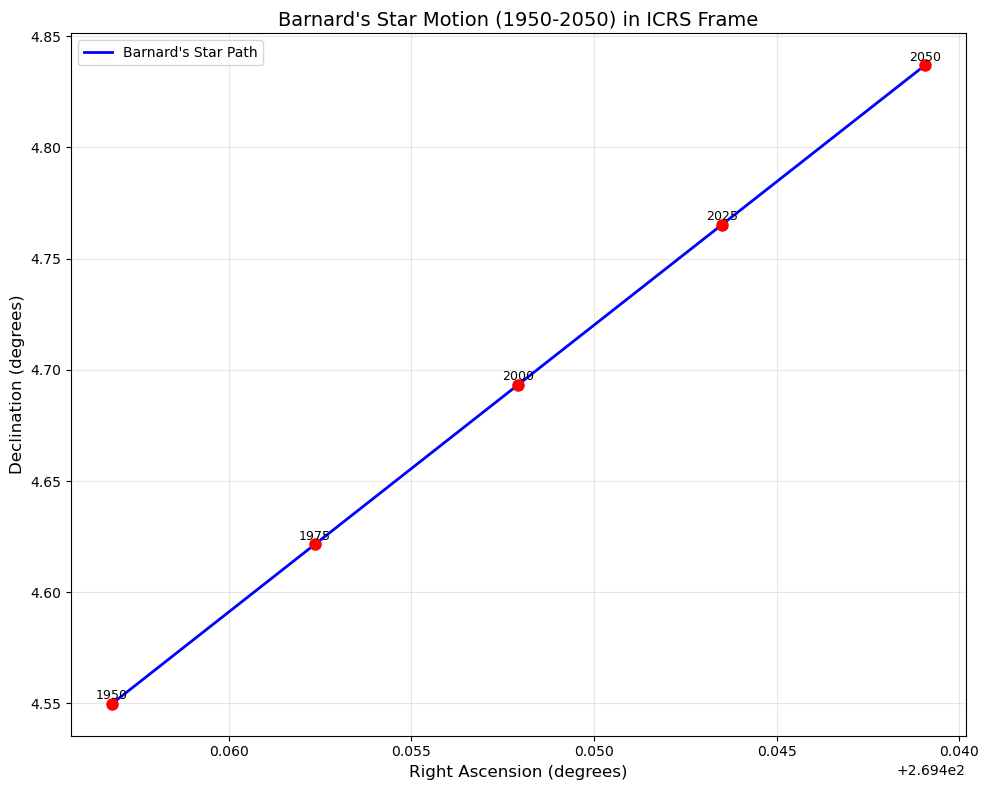

Over 100 years (1950-2050), Barnard's Star moves 1036.9 arcsec


In [59]:
#import astropy.units as u
#from astropy.coordinates import SkyCoord
from astropy.time import Time

# Barnard's Star - famous for its large proper motion
# These values come from the Hipparcos/Gaia catalogs

# Step 1: Create a Time object for our reference epoch
epoch_2000 = Time('J2000')  # Julian year 2000.0 (Jan 1, 2000, 12:00 TT)
print(f"Reference epoch: {epoch_2000.iso}")
print(f"As Julian year: {epoch_2000.jyear}")
print()

# Step 2: Define the star's position WITH proper motion at the reference epoch
barnards_star_2000 = SkyCoord(
    ra=269.45207*u.degree, 
    dec=4.69339*u.degree,
    pm_ra_cosdec=-798.71*u.mas/u.yr,  # proper motion in RA
    pm_dec=10337.77*u.mas/u.yr,        # proper motion in Dec 
    obstime=epoch_2000,                # CRITICAL: when was this position measured?
    frame='icrs'
)

print("Barnard's Star at epoch J2000.0:")
print(f"RA:  {barnards_star_2000.ra.to_string(unit=u.hour, precision=2)}")
print(f"Dec: {barnards_star_2000.dec.to_string(unit=u.degree, precision=2)}")
print(f"Proper motion in RA*cos(dec): {barnards_star_2000.pm_ra_cosdec}")
print(f"Proper motion in Dec: {barnards_star_2000.pm_dec}")
print()

# Step 3: Propagate the position to a different epoch
# apply_space_motion() uses the stored proper motion to calculate the new position
epoch_2025 = Time('J2025')
barnards_star_2025 = barnards_star_2000.apply_space_motion(epoch_2025)

print("Barnard's Star at epoch J2025.0 (25 years later):")
print(f"RA:  {barnards_star_2025.ra.to_string(unit=u.hour, precision=2)}")
print(f"Dec: {barnards_star_2025.dec.to_string(unit=u.degree, precision=2)}")
print()

# Step 4: Calculate how much the position changed
delta_ra = (barnards_star_2025.ra - barnards_star_2000.ra).to(u.arcsec)
delta_dec = (barnards_star_2025.dec - barnards_star_2000.dec).to(u.arcsec)
total_motion = np.sqrt(delta_ra**2 + delta_dec**2)

print(f"Position change over {epoch_2025.jyear - epoch_2000.jyear} years:")
print(f"  ΔRA:  {delta_ra:+.2f} = {delta_ra.to(u.arcmin):+.3f}")
print(f"  ΔDec: {delta_dec:+.2f} = {delta_dec.to(u.arcmin):+.3f}")
print(f"  Total angular motion: {total_motion:.2f} = {total_motion.to(u.arcmin):.3f}")
print()

# Step 5: Visualize the motion over a longer time span
years = np.linspace(1950, 2050, 101)
times = Time(years, format='jyear')

# Propagate to all these epochs
positions = barnards_star_2000.apply_space_motion(times)

# Create the plot
plt.figure(figsize=(10, 8))
plt.plot(positions.ra.degree, positions.dec.degree, 'b-', linewidth=2, label="Barnard's Star Path")

# Mark specific years
marker_years = [1950, 1975, 2000, 2025, 2050]
for year in marker_years:
    t = Time(year, format='jyear')
    pos = barnards_star_2000.apply_space_motion(t)
    plt.plot(pos.ra.degree, pos.dec.degree, 'ro', markersize=8)
    plt.text(pos.ra.degree, pos.dec.degree + 0.002, f'{year}', 
             ha='center', fontsize=9)

plt.xlabel('Right Ascension (degrees)', fontsize=12)
plt.ylabel('Declination (degrees)', fontsize=12)
plt.title("Barnard's Star Motion (1950-2050) in ICRS Frame", fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.gca().invert_xaxis()  # RA increases to the left by convention
plt.tight_layout()
plt.show()

print(f"Over 100 years (1950-2050), Barnard's Star moves {total_motion*4:.1f}")

#### _Representation_

So far we have been using a spherical coordinate representation in all of our examples, and this is the default for the built-in frames. Frequently it is convenient to initialize or work with a coordinate using a different representation such as Cartesian or Cylindrical. This can be done by setting the representation_type for either SkyCoord objects or low-level frame coordinate objects.

To initialize or work with a coordinate using a different representation such as Cartesian or Cylindrical:

    

In [60]:

c = SkyCoord(x=1, y=2, z=3, unit='kpc', representation_type='cartesian')
print(c.x, c.y, c.z )
#(<Quantity 1. kpc>, <Quantity 2. kpc>, <Quantity 3. kpc>)

c.representation_type = 'cylindrical'
print(c)
#<SkyCoord (ICRS): (rho, phi, z) in (kpc, deg, kpc)
#   (2.23606798, 63.43494882, 3.)>



1.0 kpc 2.0 kpc 3.0 kpc
<SkyCoord (ICRS): (rho, phi, z) in (kpc, deg, kpc)
    (2.23606798, 63.43494882, 3.)>


#### _Distance_

SkyCoord and the individual frame classes also support specifying a distance from the frame origin. The origin depends on the particular coordinate frame; this can be, for example, centered on the earth, centered on the solar system barycenter, etc.

Two angles and a distance specify a unique point in 3D space, which also allows converting the coordinates to a Cartesian representation:

    

In [61]:

 c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, distance=770*u.kpc)

 c.ra
 c.dec
 print(c.cartesian.x  )
 #<Quantity 568.71286542 kpc>

 print(c.cartesian.y)
 #<Quantity 107.3008974 kpc>

 print(c.cartesian.z  )
 #<Quantity 507.88994292 kpc>


568.7128654235231 kpc
107.3008974042025 kpc
507.88994291875713 kpc


With distances assigned, SkyCoord convenience methods are more powerful, as they can make use of the 3D information. For example, to compute the physical, 3D separation between two points in space:

    

In [62]:

c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, distance=10*u.pc, frame='icrs')
c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, distance=11.5*u.pc, frame='icrs')
 
tdsep=c1.separation_3d(c2)
print(tdsep)


1.5228602415117987 pc


SkyCoord defines a number of convenience methods that support, for example, computing on-sky (i.e., angular) and 3D separations between two coordinates.

To compute on-sky and 3D separations between two coordinates, even when the units are different:

In [63]:

c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, frame='icrs')

c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, frame='fk5')

sep=c1.separation(c2)  # Differing frames handled correctly  
print(sep.deg)
#<Angle 1.40453359 deg>


1.4045335865905932


#### _Quick Target Querying_

The astropy.coordinates sub-package also provides a quick way to get coordinates for named objects, assuming you have an active internet connection. The from_name method of SkyCoord uses Sesame -- [https://cds.unistra.fr/cgi-bin/Sesame]() -- to retrieve coordinates for a particular named object.

To retrieve coordinates for a particular named object:

    

In [64]:

SkyCoord.from_name("HIP 99770")
#<SkyCoord (ICRS): (ra, dec) in deg
#    (346.86964884, 21.13425299)>


<SkyCoord (ICRS): (ra, dec) in deg
    (303.63346814, 36.80630581)>

Note that this method is rather simple, not allowing for complex querying.  To obtain a wide range of information about targets from querying public databases, we will turn to _**astroquery**_.